In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
google_playstore = pd.read_excel('GooglePlaystore.xlsx')

In [4]:
## 3.1.1
google_playstore = google_playstore.loc[(google_playstore['Reviews'] != '3.0M')]
## 3.1.2
columns = list(google_playstore.columns)
for i in columns:
    google_playstore = google_playstore.loc[(google_playstore[i] != 'Varies with device')]
## 3.1.3 
google_playstore['Android Ver'] = google_playstore['Android Ver'].str.extract('(\d+\.?\d?)', expand=False)
google_playstore["Android Ver"]=(google_playstore["Android Ver"]).apply(float)
## 3.1.4
google_playstore["Installs"]=(google_playstore["Installs"]).apply(str)
google_playstore["Installs"] = google_playstore["Installs"].str.replace(",","")
google_playstore["Installs"] = google_playstore["Installs"].apply(lambda x: x.rstrip('+'))
google_playstore = google_playstore[google_playstore["Installs"].apply(lambda x: x.isnumeric())]  
## 3.1.5
google_playstore["Reviews"]=(google_playstore["Reviews"]).apply(float)
google_playstore["Installs"]=(google_playstore["Installs"]).apply(float)
index_null_ratings = google_playstore[(google_playstore["Rating"].isnull() == True) & ((google_playstore["Reviews"]) < 100) & ((google_playstore['Installs']) < 50000)].index
google_playstore.drop(index_null_ratings, inplace = True)
average_category = google_playstore.groupby(["Category"], as_index = False).mean()
def missing_ratings(rating, reviews, installations, category):
    if pd.isnull(rating) == True:
        specific_category = average_category.loc[average_category["Category"] == category]  
        rating = float(round(specific_category["Rating"], 2))
        return rating
    else:
        return rating
google_playstore["Rating"] = google_playstore.apply(lambda x: missing_ratings(x["Rating"], x["Reviews"], x["Installs"], x["Category"]), axis=1)
## 3.1.6
def convert_m_or_k(size):
    if pd.notnull(size):
        size = str(size)
        m_or_k = size[-1]
        if str(m_or_k) == "M" or str(m_or_k) == 'm':
            l = len(size)
            size = size[:l-1]
            size = float(size)*1000000
        if str(m_or_k) == "K" or str(m_or_k) == 'k':
            size = size[0:-1]
            size = float(size)*1000
        return size
google_playstore["Size"] = google_playstore.apply(lambda x: convert_m_or_k(x["Size"]), axis=1)

In [5]:
google_playstore.to_excel("modified_playstore2.xlsx")

In [6]:
## 3.2.1
list_of_genres = google_playstore['Category'].to_list()
genres = []
for i in list_of_genres:
    if i not in genres:
        genres.append(i)
for genre in genres:
    genre_ratings = []
    google_playstore.apply(lambda x : genre_ratings.append(float(x['Rating'])) if x['Category'] == genre else False, axis = 1)
    df_genre_ratings = pd.DataFrame(genre_ratings, columns = ["Ratings"])
    print(df_genre_ratings.describe(include = 'all'))

         Ratings
count  59.000000
mean    4.358644
std     0.365322
min     3.200000
25%     4.100000
50%     4.400000
75%     4.700000
max     5.000000
         Ratings
count  62.000000
mean    4.146774
std     0.569935
min     2.100000
25%     3.900000
50%     4.250000
75%     4.500000
max     4.900000
         Ratings
count  40.000000
mean    4.291750
std     0.356175
min     3.100000
25%     4.075000
50%     4.300000
75%     4.525000
max     4.900000
          Ratings
count  147.000000
mean     4.320136
std      0.453084
min      2.700000
25%      4.100000
50%      4.400000
75%      4.600000
max      5.000000
          Ratings
count  246.000000
mean     4.119187
std      0.662586
min      1.000000
25%      3.825000
50%      4.300000
75%      4.500000
max      5.000000
         Ratings
count  49.000000
mean    4.154082
std     0.550363
min     2.800000
25%     3.800000
50%     4.400000
75%     4.600000
max     5.000000
          Ratings
count  210.000000
mean     4.100952
std      0

In [7]:
#3.2.2
google_playstore["Rating"]=(google_playstore["Rating"]).apply(float)
free_apps = google_playstore.loc[(google_playstore['Type'] == 'Free')]
sorted_rating = free_apps.sort_values(['Rating'], ascending = [False])
sorted_reviews = free_apps.sort_values(['Reviews'], ascending = [False])
sorted_installs = free_apps.sort_values(['Installs'], ascending = [False])
def top_three(category):
    if category == "Rating":
        column_names = ["Category", "App", "Rating"]
        rearranged = sorted_rating.reindex(columns=column_names)
        top_three = rearranged.head(3)
    if category == "Reviews":
        column_names = ["Category", "App", "Reviews"]
        rearranged = sorted_reviews.reindex(columns=column_names)
        top_three = rearranged.head(3)
    if category == "Installs":
        column_names = ["Category", "App", "Installs"]
        rearranged = sorted_installs.reindex(columns=column_names)
        top_three = rearranged.head(3)
    return top_three
print(top_three("Rating"))
print(top_three("Reviews"))
print(top_three("Installs"))

        Category                                App  Rating
10837     FAMILY   Fr. Mike Schmitz Audio Teachings     5.0
8104   LIFESTYLE           Cy-Fair Christian Church     5.0
8275      FAMILY  DC N COMPANY ENTERTAINMENT RADIO!     5.0
     Category             App     Reviews
1879     GAME  Clash of Clans  44893888.0
1704     GAME  Clash of Clans  44891723.0
1670     GAME  Clash of Clans  44891723.0
                Category             App      Installs
1872                GAME  Subway Surfers  1.000000e+09
3736  NEWS_AND_MAGAZINES     Google News  1.000000e+09
1917                GAME  Subway Surfers  1.000000e+09


In [8]:
## 3.2.3
paid = []
paid_apps = google_playstore.loc[(google_playstore["Type"] == "Paid")]
paid_apps.apply(lambda x : paid.append(x['Price']), axis = 1)
price_paid = pd.DataFrame(paid, columns = ["Price"])
print(price_paid.describe())

            Price
count  574.000000
mean    15.139164
std     62.218312
min      0.990000
25%      1.812500
50%      2.990000
75%      4.990000
max    400.000000


In [9]:
## 3.3.1
list_of_genres = google_playstore['Genres'].to_list()
genres = []
number_of_apps = []
for i in list_of_genres:
    if i not in genres:
        genres.append(i)
for genre in genres:
    number_of_app = google_playstore.apply(lambda x : True if str(x['Genres']) == genre else False, axis = 1)
    num_rows = len(number_of_app[number_of_app == True].index)
    number_of_apps.append(num_rows)
google_playstore['Genres'] = google_playstore['Genres'].apply(str)
google_playstore['Genres'] = google_playstore['Genres'].str.split(';')
google_playstore.to_excel("modified_3.xlsx")

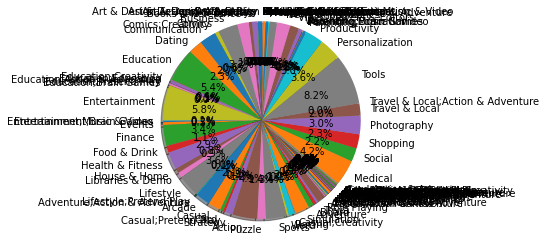

In [10]:
fig1, ax1 = plt.subplots()
ax1.pie(number_of_apps, labels=genres, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [11]:
## 3.3.2
business_list = []
number_of_business = google_playstore.apply(lambda x : business_list.append(float(x['Rating'])) if x['Category'] == "BUSINESS" else False, axis = 1)
business_list = [x for x in business_list if pd.isnull(x) == False]
education_list = []
number_of_education = google_playstore.apply(lambda x : education_list.append(float(x['Rating'])) if x['Category'] == "EDUCATION" else False, axis = 1)
education_list = [x for x in education_list if pd.isnull(x) == False]

{'whiskers': [<matplotlib.lines.Line2D at 0x19c86389280>,
 'caps': [<matplotlib.lines.Line2D at 0x19c863a8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c86376c70>,
 'medians': [<matplotlib.lines.Line2D at 0x19c863dd2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19c863dd400>,
 'means': []}

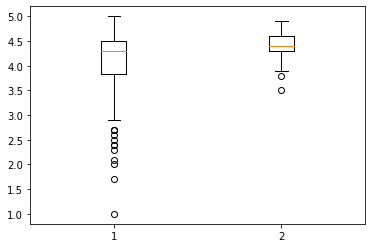

In [12]:
data = [business_list, education_list]
plt.boxplot(data)